<a href="https://colab.research.google.com/github/springboardmentor1979b-cmyk/ScoreSight---Predicting-EPL-Points-Tally-Top-Scorer/blob/vishal_umare/Vishal_EplScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path ='/content/drive/MyDrive/Internship/dataset_epl.csv'

In [3]:
import pandas as pd
df=pd.read_csv(file_path)
print(df)

                     Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward   

    Nationality   Age  Appe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [ ]:
df.shape

(571, 59)

In [ ]:
df.head(10)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
5,William Saliba,4.0,Arsenal,Defender,France,19.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
6,Sokratis,5.0,Arsenal,Defender,Greece,32.0,44,21,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,18,0,56,1.0
7,Rob Holding,16.0,Arsenal,Defender,England,25.0,41,25,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,32,0.0
8,Shkodran Mustafi,20.0,Arsenal,Defender,Germany,28.0,99,52,26,7,...,NaN,NaN,NaN,NaN,NaN,NaN,28,0,117,7.0
9,Calum Chambers,21.0,Arsenal,Defender,England,25.0,139,47,57,6,...,NaN,NaN,NaN,NaN,NaN,NaN,28,1,137,2.0


In [ ]:
df.tail(3)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
570,Leonardo Campana,30.0,Wolverhampton-Wanderers,Forward,Ecuador,20.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


**Task 1. Identify which column are useful for predicting player performance**

In [ ]:
useful_columns = [
    'Appearances', 'Goals', 'Assists', 'Shots', 'Passes',
    'Tackles', 'Interceptions', 'Dribbles', 'Crosses',
    'Minutes'
]

[c for c in useful_columns if c in df.columns]

['Appearances',
 'Goals',
 'Assists',
 'Shots',
 'Passes',
 'Tackles',
 'Interceptions',
 'Crosses']

**Task 2.Make a short note of irrelevant column**

In [ ]:
irrelevant_columns = ['Name', 'Club', 'Jersey Number', 'Nationality']
[c for c in irrelevant_columns if c in df.columns]

# Certain columns in the dataset - such as Name, Jersey Number, and Nationality - do not have any direct influence on a player's on-field performance
# These attributes do not contribute meaningful statistical information for predicting player potential or performance metrics.
# Hence, they are considered irrelevant features and can be removed from the dataset to improve model efficiency and reduce noise during analysis.

['Name', 'Club', 'Jersey Number', 'Nationality']

**Task 3.Handle missing values(Find empty or 0 values in imp column and replace with mean.)**

In [ ]:
import pandas as pd
import numpy as np

# Important performance columns
important_cols = ['Goals', 'Assists', 'Appearances', 'Shots', 'Shooting accuracy %']

# Ensure accuracy column exists before processing
if "Shooting accuracy %" in df.columns:
    df["Shooting accuracy %"] = (
        df["Shooting accuracy %"].astype(str).str.replace('%', '', regex=True)
    )

# Replace 0 with NaN only in these important columns
df[important_cols] = df[important_cols].replace(0, np.nan)

# Convert all important columns to numeric
df[important_cols] = df[important_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing values with mean
df[important_cols] = df[important_cols].fillna(df[important_cols].mean())

# Check missing values after final cleaning
print("Missing Values After Cleaning:")
print(df[important_cols].isna().sum())

print("\nCleaned Important Columns (first 5 rows):")
print(df[important_cols].head())

Missing Values After Cleaning:
Goals                  0
Assists                0
Appearances            0
Shots                  0
Shooting accuracy %    0
dtype: int64

Cleaned Important Columns (first 5 rows):
       Goals    Assists  Appearances       Shots  Shooting accuracy %
0  13.198738   9.090361    64.000000  119.524528            28.679612
1  13.198738   9.090361    81.700624  119.524528            28.679612
2  13.198738   9.090361    81.700624  119.524528            28.679612
3   7.000000  18.000000   160.000000  119.524528            28.679612
4   1.000000   1.000000    16.000000  119.524528            28.679612


**4. Feature Selection**

In [ ]:
df[important_cols]

,Goals,Assists,Appearances,Shots,Shooting accuracy %
0,13.198738,9.090361,64.000000,119.524528,28.679612
1,13.198738,9.090361,81.700624,119.524528,28.679612
2,13.198738,9.090361,81.700624,119.524528,28.679612
3,7.000000,18.000000,160.000000,119.524528,28.679612
4,1.000000,1.000000,16.000000,119.524528,28.679612
...,...,...,...,...,...
566,3.000000,4.000000,31.000000,19.000000,32.000000
567,32.000000,13.000000,78.000000,237.000000,35.000000
568,5.000000,12.000000,105.000000,78.000000,27.000000
569,13.198738,9.090361,1.000000,119.524528,0.000000


**5. Categorize The Columns**

In [ ]:
# Column grouping
CATEGORICAL_COLS = [
    'Name', 'Jersey Number', 'Club', 'Position', 'Nationality'
]

COUNT_NUMERICAL_COLS = [
    'Age', 'Appearances', 'Wins', 'Losses', 'Goals', 'Headed goals',
    'Goals with right foot', 'Goals with left foot', 'Penalties scored',
    'Freekicks scored', 'Shots', 'Shots on target', 'Hit woodwork',
    'Big chances missed', 'Clean sheets', 'Goals conceded', 'Tackles',
    'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
    'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
    'Duels lost', 'Successful 50/50s', 'Aerial battles won',
    'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
    'Passes', 'Big chances created', 'Crosses', 'Through balls',
    'Accurate long balls', 'Saves', 'Penalties saved', 'Punches',
    'High Claims', 'Catches', 'Sweeper clearances', 'Throw outs',
    'Goal Kicks', 'Yellow cards', 'Red cards', 'Fouls', 'Offsides'
]
COUNT_NUMERICAL_COLS = [col for col in COUNT_NUMERICAL_COLS if col in df.columns]

RATE_NUMERICAL_COLS = [
    'Goals per match', 'Shooting accuracy %', 'Tackle success %',
    'Cross accuracy %', 'Passes per match'
]

RATE_NUMERICAL_COLS = [col for col in RATE_NUMERICAL_COLS if col in df.columns]


# Convert categorical columns to string
for col in CATEGORICAL_COLS:
    if col in df.columns:
        df[col] = df[col].astype(str)

# Convert percentage columns into numeric
for col in RATE_NUMERICAL_COLS:
    df[col] = (
        df[col].astype(str)
               .str.replace('%', '', regex=True)
               .astype(float)
    )

# Replace zero with NaN and fill missing values using column mean
for col in COUNT_NUMERICAL_COLS + RATE_NUMERICAL_COLS:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].replace(0, np.nan)
        df[col] = df[col].fillna(df[col].mean())

# Check missing values
print("Remaining Missing Values:")
print(df.isna().sum().sort_values(ascending=False).head(10))

Remaining Missing Values:
Name             0
Jersey Number    0
Club             0
Position         0
Nationality      0
Age              0
Appearances      0
Wins             0
Losses           0
Goals            0
dtype: int64


In [ ]:
cleaned_file_path = '/content/drive/MyDrive/dataset_cleaned_epl.csv'
df.to_csv(cleaned_file_path, index=False)
print("Cleaned dataset saved:", cleaned_file_path)


Cleaned dataset saved: /content/drive/MyDrive/dataset_cleaned_epl.csv


**Encode categorical values**

In [ ]:
# Install required packages
!pip install pandas scikit-learn
# Import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Sample dataframe
data = {
    'Club': ['Arsenal', 'Chelsea', 'Liverpool', 'Arsenal'],
    'Position': ['Forward', 'Midfielder', 'Defender', 'Forward'],
    'Home/Away': ['Home', 'Away', 'Home', 'Away']
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# One-Hot Encoding using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=['Club', 'Position', 'Home/Away'])
print("\nOne-Hot Encoded DataFrame:")
print(df_encoded)


Original DataFrame:
        Club    Position Home/Away
0    Arsenal     Forward      Home
1    Chelsea  Midfielder      Away
2  Liverpool    Defender      Home
3    Arsenal     Forward      Away

One-Hot Encoded DataFrame:
   Club_Arsenal  Club_Chelsea  Club_Liverpool  Position_Defender  \
0          True         False           False              False   
1         False          True           False              False   
2         False         False            True               True   
3          True         False           False              False   

   Position_Forward  Position_Midfielder  Home/Away_Away  Home/Away_Home  
0              True                False           False            True  
1             False                 True            True           False  
2             False                False           False            True  
3              True                False            True           False  


***HOMEWORK 1 — Exploratory Data Analysis***

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Make plots bigger
plt.rcParams['figure.figsize'] = (10, 6)


**Histogram → X: Goals | Y: Frequency**

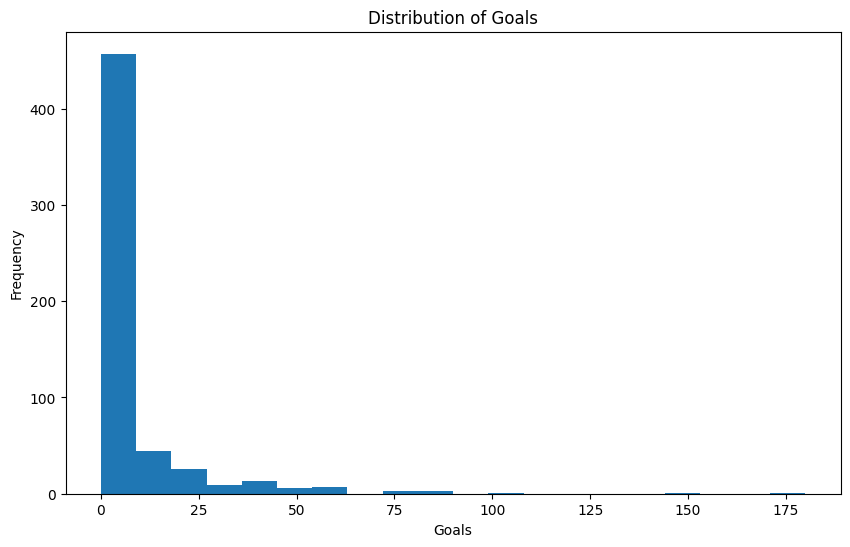

In [5]:
plt.hist(df['Goals'], bins=20)
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.title("Distribution of Goals")
plt.show()


**2. SCATTER PLOT: Appearances vs Goals**

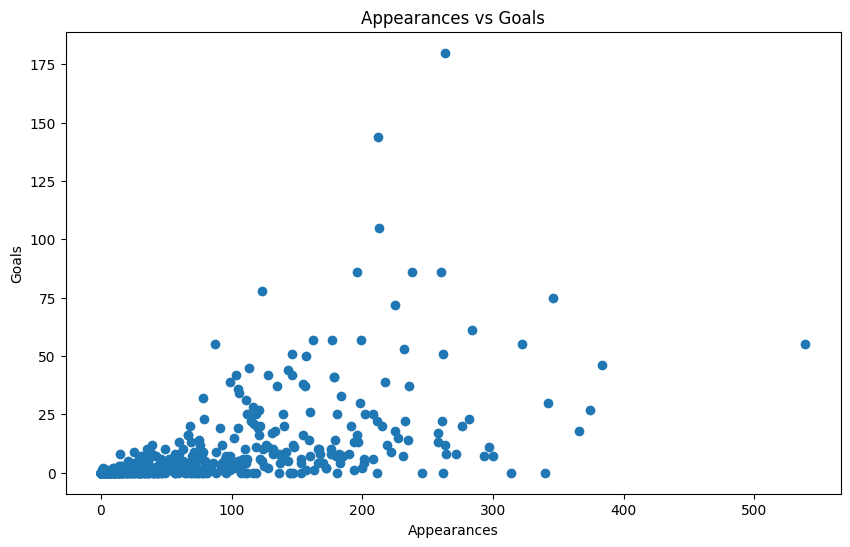

In [6]:
plt.scatter(df['Appearances'], df['Goals'])
plt.xlabel("Appearances")
plt.ylabel("Goals")
plt.title("Appearances vs Goals")
plt.show()


**3. SCATTER PLOT: Age vs Goals**

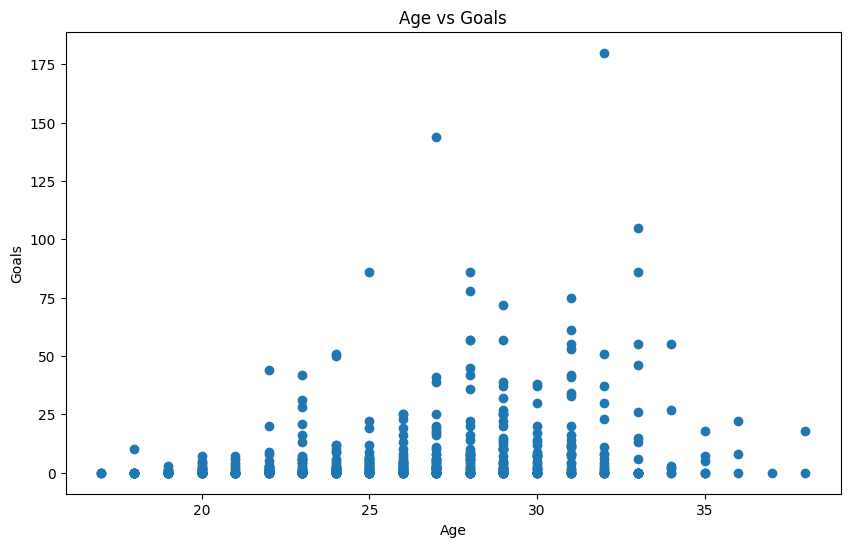

In [7]:
plt.scatter(df['Age'], df['Goals'])
plt.xlabel("Age")
plt.ylabel("Goals")
plt.title("Age vs Goals")
plt.show()


**4. BAR CHART: Club vs Goals (Sum)**

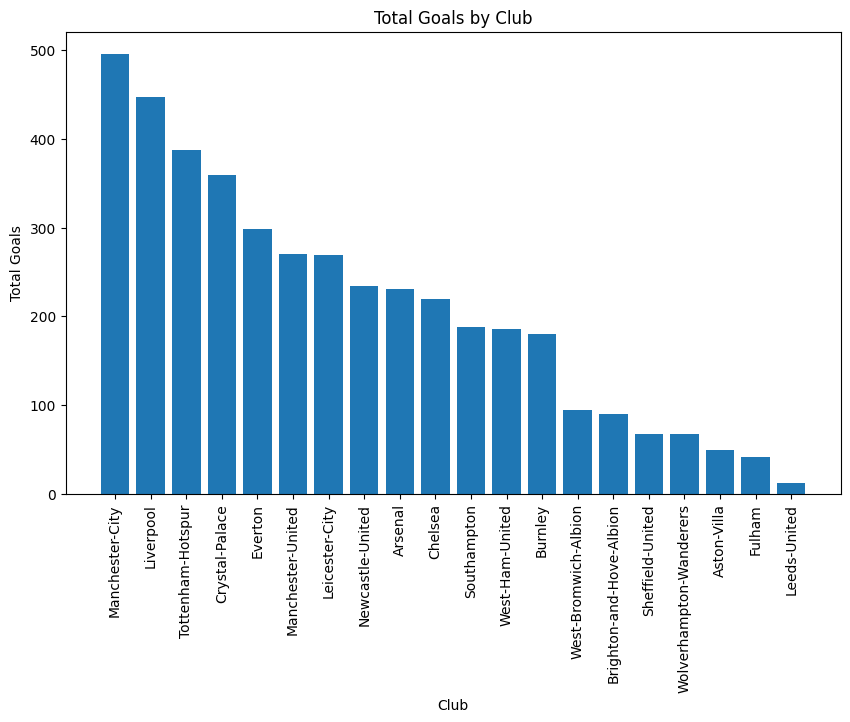

In [8]:
club_goals = df.groupby('Club')['Goals'].sum().sort_values(ascending=False)

plt.bar(club_goals.index, club_goals.values)
plt.xticks(rotation=90)
plt.xlabel("Club")
plt.ylabel("Total Goals")
plt.title("Total Goals by Club")
plt.show()


**5. BAR CHART: Position vs Goals (Average)**

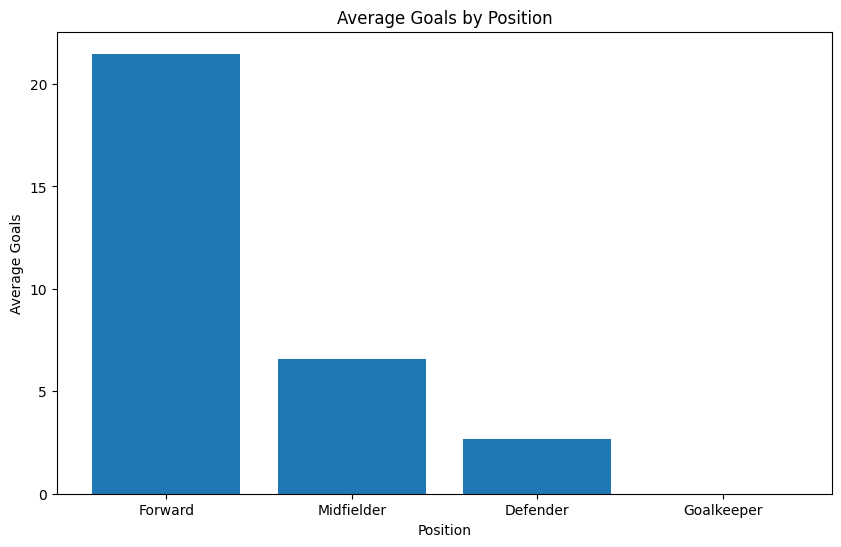

In [9]:
position_goals = df.groupby('Position')['Goals'].mean().sort_values(ascending=False)

plt.bar(position_goals.index, position_goals.values)
plt.xlabel("Position")
plt.ylabel("Average Goals")
plt.title("Average Goals by Position")
plt.show()


**6. SCATTER PLOT: Shots vs Goals**

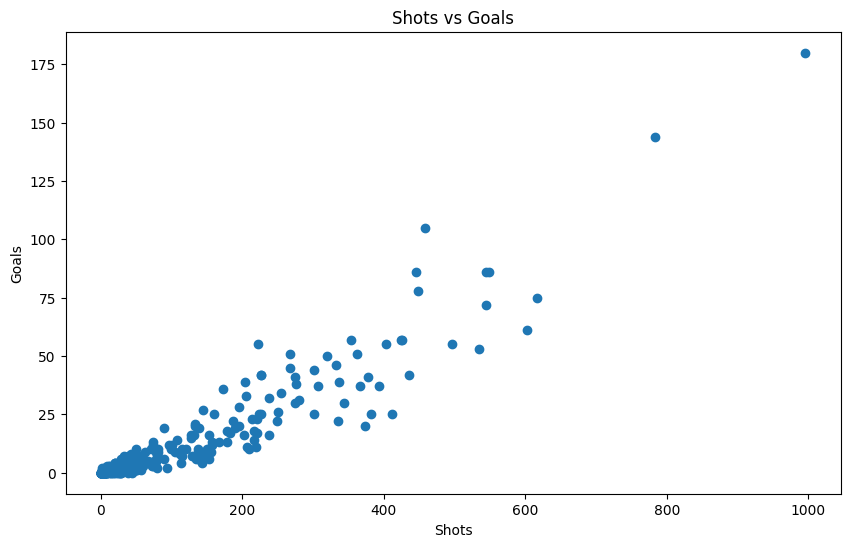

In [10]:
plt.scatter(df['Shots'], df['Goals'])
plt.xlabel("Shots")
plt.ylabel("Goals")
plt.title("Shots vs Goals")
plt.show()


**7. SCATTER PLOT: Assists vs Goals**

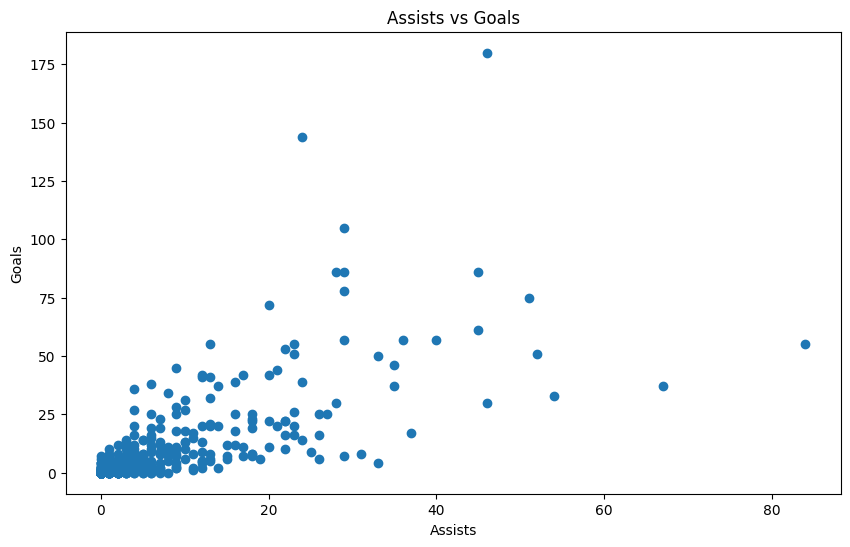

In [11]:
plt.scatter(df['Assists'], df['Goals'])
plt.xlabel("Assists")
plt.ylabel("Goals")
plt.title("Assists vs Goals")
plt.show()


**8. SCATTER PLOT: Passes vs Assists**

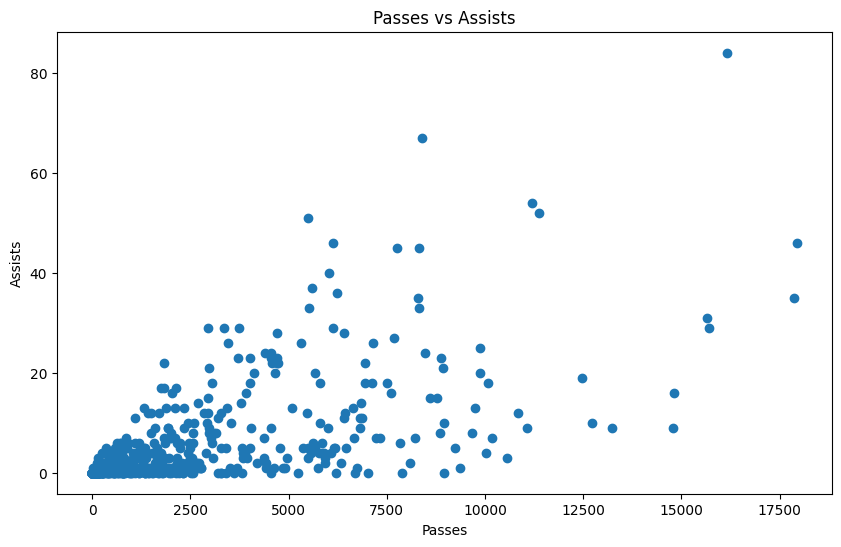

In [12]:
plt.scatter(df['Passes'], df['Assists'])
plt.xlabel("Passes")
plt.ylabel("Assists")
plt.title("Passes vs Assists")
plt.show()


**9. SCATTER PLOT: Tackles vs Tackle Success %**

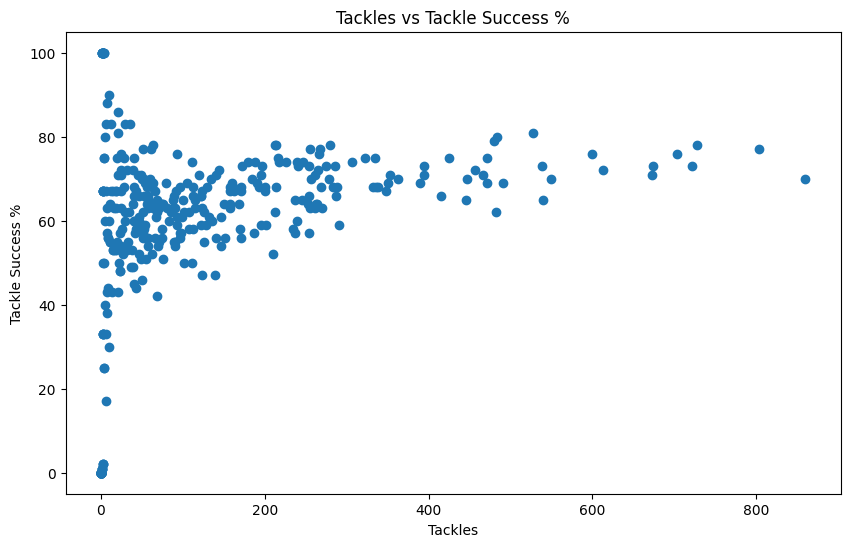

In [15]:
# Clean the "Tackle success %" column
df['Tackle success %'] = (
    df['Tackle success %']
    .astype(str)          # convert everything to string
    .str.replace('%', '') # remove % symbol
    .str.strip()          # remove extra spaces
    .astype(float)        # convert to float
)

# Scatter plot
plt.scatter(df['Tackles'], df['Tackle success %'])
plt.xlabel("Tackles")
plt.ylabel("Tackle Success %")
plt.title("Tackles vs Tackle Success %")
plt.show()


**10. BAR CHART: Nationality vs Goals (Sum)**

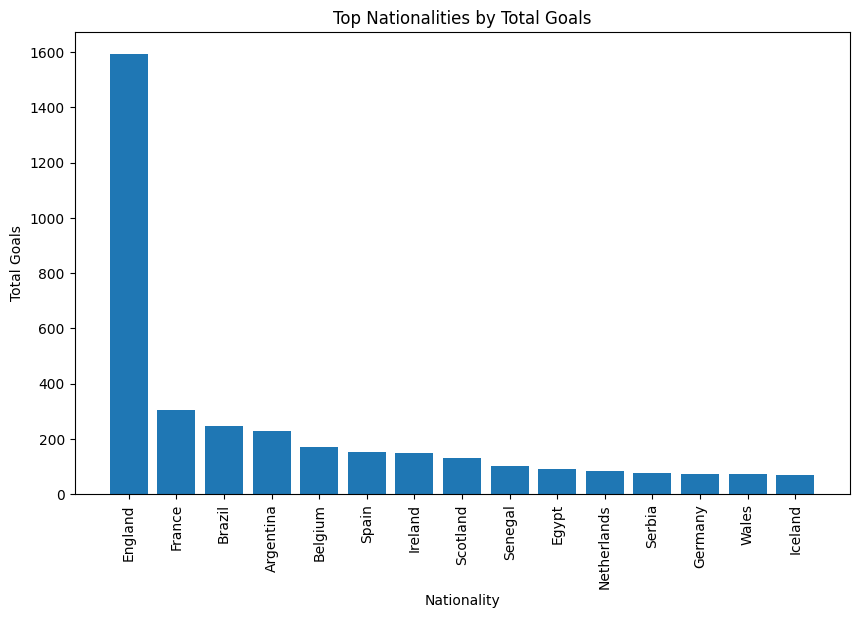

In [16]:
nat_goals = df.groupby('Nationality')['Goals'].sum().sort_values(ascending=False).head(15)

plt.bar(nat_goals.index, nat_goals.values)
plt.xticks(rotation=90)
plt.xlabel("Nationality")
plt.ylabel("Total Goals")
plt.title("Top Nationalities by Total Goals")
plt.show()
